# Sentiment Analysis Using TF-IDF and Logistic Regression

This notebook performs sentiment analysis on a customer reviews dataset using NLP techniques such as text cleaning, TF-IDF vectorization, and Logistic Regression.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# Load the dataset
df = pd.read_csv('train.csv', encoding='latin1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [6]:
# Rename columns if necessary
df = df.rename(columns={'text': 'Review', 'label': 'Sentiment'})

In [11]:
# Define text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
df['Cleaned_Review'] = df['Review'].astype(str).apply(clean_text)

In [20]:
df.columns = df.columns.str.strip()  # Removes whitespace
X_train = df['Cleaned_Review']
y_train = df['sentiment']  # or check with df.columns to confirm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [22]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [23]:
# Evaluate the model
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6927414953611061

Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.61      0.66      1562
     neutral       0.63      0.75      0.68      2230
    positive       0.78      0.70      0.74      1705

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497



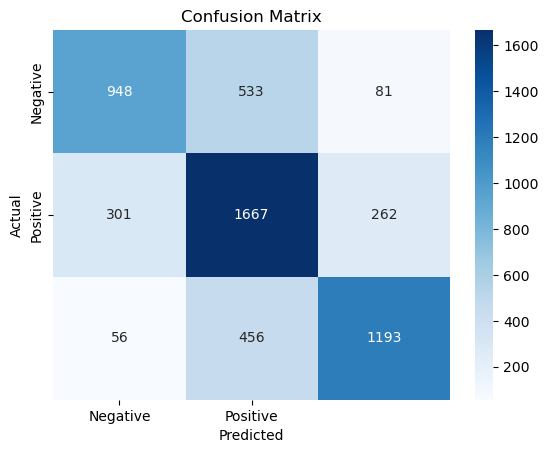

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Predict a new review
def predict_sentiment(review):
    cleaned = clean_text(review)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    return "Positive" if prediction[0] == 1 else "Negative"

# Example
predict_sentiment("The service was terrible and the staff were very rude.")

'Negative'